<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema05/03-kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 50kB/s 
     |████████████████████████████████| 3.2MB 42.8MB/s 
     |████████████████████████████████| 491kB 43.8MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Núcleos de convolución no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (**kernel**) de la SVM
- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j)= (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i, x_j)= (x_i\cdot x_j +1)^d$
- Kernel de tangente hiperbólica: $(x_i, x_j)= tanh(a x_i\cdot x_j +k)$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [0]:
session = tf.Session()

In [0]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

In [7]:
x_vals

array([[-0.11085878, -0.50775599],
       [-0.96258681, -0.53108096],
       [ 0.38931319, -0.38191145],
       [ 0.17092801, -0.57054904],
       [ 0.23402329,  0.41287979],
       [ 0.03739559, -0.43965615],
       [-0.30636976,  0.41892661],
       [-0.04649861,  0.5948764 ],
       [-0.83428682, -0.2137461 ],
       [-0.77520219, -0.27115829],
       [-0.98970257,  0.45620245],
       [-1.09990158,  0.30447804],
       [-0.90327355, -0.46266782],
       [-0.3497242 , -0.06379022],
       [-0.33026724,  0.11804871],
       [ 1.00388898, -0.6556848 ],
       [ 0.64232155, -0.90077054],
       [-0.04395972, -1.08643811],
       [-0.03807661,  0.32457642],
       [ 1.03797663, -0.16446127],
       [ 0.14134114, -0.4953774 ],
       [ 0.11306083,  1.04021868],
       [-0.14045593,  0.40962523],
       [-0.40623051, -0.01065041],
       [-0.33342016, -0.24475069],
       [ 0.27322257,  0.4470147 ],
       [ 0.6720512 ,  0.75071733],
       [-0.2189137 , -0.32165212],
       [-0.32655286,

In [8]:
y_vals

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [0]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [0]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

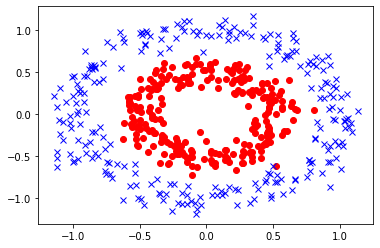

In [11]:
plt.plot(class1_x, class1_y, 'ro', label = "Clase 1")
plt.plot(class2_x, class2_y, 'bx', label = "Clase 2")
plt.show()

In [0]:
batch_size = 500
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [0]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), 
                     tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [0]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [0]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [0]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [0]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [0]:
my_optim = tf.train.GradientDescentOptimizer(0.002)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [20]:
loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    
    acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_acc.append(acc_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+ ", Pérdida = "+str(temp_loss)+", Precisión = "+str(acc_temp))

Paso #50, Pérdida = 275.3906, Precisión = 0.618
Paso #100, Pérdida = 211.12549, Precisión = 0.536
Paso #150, Pérdida = 140.00095, Precisión = 0.624
Paso #200, Pérdida = 67.57985, Precisión = 0.74
Paso #250, Pérdida = 52.38958, Precisión = 0.704
Paso #300, Pérdida = 38.093857, Precisión = 0.74
Paso #350, Pérdida = 18.54097, Precisión = 0.816
Paso #400, Pérdida = 6.6159153, Precisión = 0.806
Paso #450, Pérdida = 1.6145649, Precisión = 0.908
Paso #500, Pérdida = -7.159622, Precisión = 0.94
Paso #550, Pérdida = -8.057392, Precisión = 0.948
Paso #600, Pérdida = -9.804357, Precisión = 0.976
Paso #650, Pérdida = -10.638081, Precisión = 0.982
Paso #700, Pérdida = -11.061752, Precisión = 0.986
Paso #750, Pérdida = -10.676359, Precisión = 0.986
Paso #800, Pérdida = -10.694174, Precisión = 0.984
Paso #850, Pérdida = -12.162769, Precisión = 0.988
Paso #900, Pérdida = -11.232866, Precisión = 0.994
Paso #950, Pérdida = -11.997003, Precisión = 0.994
Paso #1000, Pérdida = -11.95768, Precisión = 0.992


In [0]:
# crea una parrilla
x_min, x_max = x_vals[:,0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:,1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [24]:
yy

array([[-2.18751304, -2.18751304, -2.18751304, ..., -2.18751304,
        -2.18751304, -2.18751304],
       [-2.16751304, -2.16751304, -2.16751304, ..., -2.16751304,
        -2.16751304, -2.16751304],
       [-2.14751304, -2.14751304, -2.14751304, ..., -2.14751304,
        -2.14751304, -2.14751304],
       ...,
       [ 2.11248696,  2.11248696,  2.11248696, ...,  2.11248696,
         2.11248696,  2.11248696],
       [ 2.13248696,  2.13248696,  2.13248696, ...,  2.13248696,
         2.13248696,  2.13248696],
       [ 2.15248696,  2.15248696,  2.15248696, ...,  2.15248696,
         2.15248696,  2.15248696]])

In [26]:
grid_points

array([[-2.14474918, -2.18751304],
       [-2.12474918, -2.18751304],
       [-2.10474918, -2.18751304],
       ...,
       [ 2.07525082,  2.15248696],
       [ 2.09525082,  2.15248696],
       [ 2.11525082,  2.15248696]])

In [0]:
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals,
                                                   y_target: np.transpose([y_vals]),
                                                   prediction_grid: grid_points})

In [28]:
grid_predictions

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [0]:
grid_predictions = grid_predictions.reshape(xx.shape)

In [30]:
grid_predictions # parrilla o malla

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

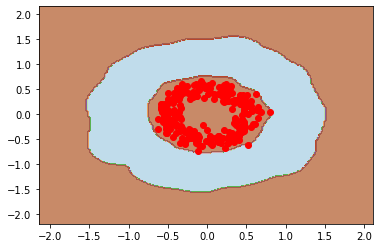

In [32]:
plt.contourf(xx,yy, grid_predictions, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.show()

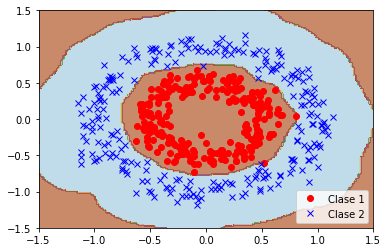

In [33]:
plt.contourf(xx,yy, grid_predictions, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.plot(class2_x, class2_y, 'bx', label="Clase 2")
plt.legend(loc="lower right")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

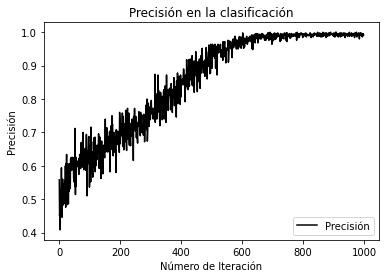

In [34]:
plt.plot(batch_acc, 'k-', label="Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.show()

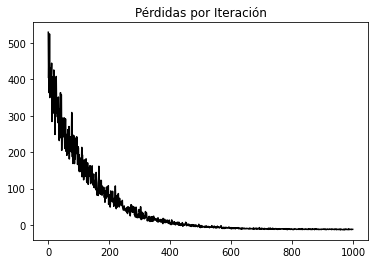

In [35]:
plt.plot(loss_vect, 'k-')
plt.title("Pérdidas por Iteración")
plt.show()

In [36]:
import sympy
sympy.binomial(4,1)

4